<a href="https://colab.research.google.com/github/Samarth-1921/Project/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.8.2 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.


/usr/local/lib/python3.11/dist-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req      

SAI - Sector 1 :0 days 00:00:26.701000
SAI - Sectoe 2 :0 days 00:00:26.988000
SAI - Sector 3 :0 days 00:00:26.605000
NOR - Sector 1 :0 days 00:00:26.946000
NOR - Sectoe 2 :0 days 00:00:27.270000
NOR - Sector 3 :0 days 00:00:26.763000
VER - Sector 1 :0 days 00:00:26.758000
VER - Sectoe 2 :0 days 00:00:27.049000
VER - Sector 3 :0 days 00:00:26.500000


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WARNING 	Driver 55 completed the race distance 06:14.695000 before the recorded end of the session.
core        WARNING 	Driver 16 completed the race distance 06:14.511000 before the recorded end of the session.
core        WARNING 	Driver 63 completed the race distance 06:07.860000 before the re

   Abbreviation  Position  ...                   Time         Status
1           VER       1.0  ... 0 days 01:13:41.143000       Finished
11          PER       2.0  ... 0 days 00:00:06.064000       Finished
55          SAI       3.0  ... 0 days 00:00:11.193000       Finished
16          LEC       4.0  ... 0 days 00:00:11.377000       Finished
63          RUS       5.0  ... 0 days 00:00:23.028000       Finished
44          HAM       6.0  ... 0 days 00:00:42.679000       Finished
23          ALB       7.0  ... 0 days 00:00:45.106000       Finished
4           NOR       8.0  ... 0 days 00:00:45.449000       Finished
14          ALO       9.0  ... 0 days 00:00:46.294000       Finished
77          BOT      10.0  ... 0 days 00:01:04.056000       Finished
40          LAW      11.0  ... 0 days 00:01:10.638000       Finished
81          PIA      12.0  ... 0 days 00:01:13.074000       Finished
2           SAR      13.0  ... 0 days 00:01:18.557000       Finished
24          ZHO      14.0  ... 0 d

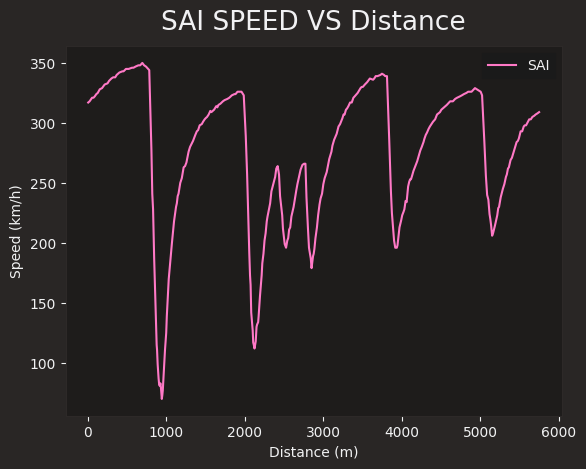

In [ ]:
import os
os.makedirs('./cache', exist_ok=True)


import fastf1 as ff1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastf1.plotting import setup_mpl

ff1.Cache.enable_cache('./cache')

setup_mpl()

session = ff1.get_session(2023,'Monza','Q')
session.load()

driver = [ 'SAI','NOR','VER']

laps = session.laps
fastest_laps = {drv: laps.pick_driver(drv).pick_fastest()for drv in driver }

for drv, lap in fastest_laps.items():
  print(f"{drv} - Sector 1 :{lap['Sector1Time']}")
  print(f"{drv} - Sectoe 2 :{lap['Sector2Time']}")
  print(f"{drv} - Sector 3 :{lap['Sector3Time']}")

ver_telemetery = fastest_laps['SAI'].get_car_data().add_distance()
plt.plot(ver_telemetery['Distance'],ver_telemetery['Speed'], label = 'SAI')
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('SAI SPEED VS Distance')
plt.legend()
plt.show

session = ff1.get_session(2023,'Monza','R')
session.load()

results = session.results[['Abbreviation','Position','TeamName','Time','Status']]
print(results)

